In [207]:
import matplotlib.pyplot as plt
import numpy as np

In [208]:
def plot_results(subplot_data, titles, overall_title):
    """
    Plot the visualization for all cases of Outcomes and Disparities 
    """
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        for x_vals, y_vals, label in subplot_data[i]:
            ax.plot(x_vals, y_vals, marker='o', label=label)

        ax.set_title(titles[i])
        row = i // 2

        if row == 0:
            ax.set_xlabel(r'$\mu_A / \mu_B$')  # Mortality disparity
        else:
            ax.set_xlabel(r'$\beta_A / \beta_B$')  # Transmission disparity

        ax.set_ylabel('% Increase in CoF')
        ax.legend(fontsize='x-small', markerscale=0.7, labelspacing=0.3, handlelength=1.5)
        ax.grid(True)

    fig.text(0.5, 0.008, 'Outcome Metric', ha='center', fontsize=12)
    fig.text(0.008, 0.5, 'Disparity Metric', va='center', rotation='vertical', fontsize=12)
    fig.suptitle(overall_title, fontsize=16, y=0.90)

    plt.tight_layout(rect=[0.04, 0.04, 0.96, 0.91]) 
    plt.show()

In [209]:
def plot_single_result(data, title):
    plt.figure(figsize=(8, 6))

    for x_vals, y_vals, label in data:
        plt.plot(x_vals, y_vals, marker='o', label=label)

    plt.title(title)
    plt.xlabel("Disparity Metric: Mortality Rate")
    plt.ylabel("Outcome Metric: Deaths")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [210]:
def compute_percent(with_equity, without): 
    """
    Helper function to compute the percent increase of the cost of fairness 
    """
    percent_increase = []
    for i in range(len(with_equity)): 
        percent_increase.append((with_equity[i] - without[i]) / without[i])
    return percent_increase

In [211]:
def compute_cof(with_equity, without): 
    """
    Helper function to compute the cost of fairness 
    """
    cof = []
    for i in range(len(with_equity)): 
        cof.append(with_equity[i] - without[i]) 
    return cof

In [212]:
def compute_difference(group_A, group_B): 
    differences = []
    for i in range(len(group_B)): 
        differences.append(abs(group_B[i] - group_A[i]))
    return differences

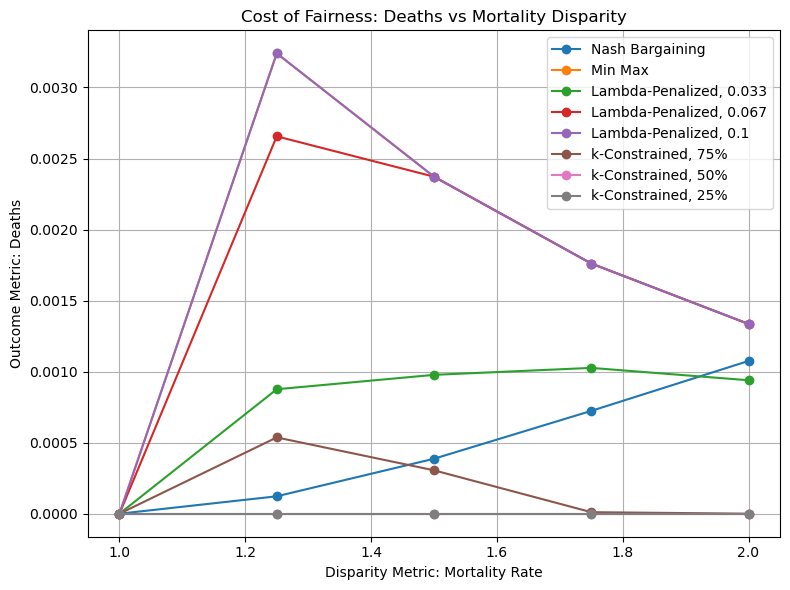

In [213]:
subplot_1_data = [  # Subplot 1: Deaths vs Mortality Disparity
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118118, 106180, 98267, 92635, 88460], [118118, 106167, 98229, 92568, 88365]), "Nash Bargaining"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118118, 106511, 98462, 92731, 88483], [118118, 106167, 98229, 92568, 88365]), "Min Max"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118118, 106260, 98325, 92663, 88448], [118118, 106167, 98229, 92568, 88365]), "Lambda-Penalized, 0.033"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118118, 106449, 98462, 92731, 88483], [118118, 106167, 98229, 92568, 88365]), "Lambda-Penalized, 0.067"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118118, 106511, 98462, 92731, 88483], [118118, 106167, 98229, 92568, 88365]), "Lambda-Penalized, 0.1"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118118, 106224, 98259, 92569, 88365], [118118, 106167, 98229, 92568, 88365]), "k-Constrained, 75%"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118118, 106167, 98229, 92568, 88365], [118118, 106167, 98229, 92568, 88365]), "k-Constrained, 50%"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118118, 106167, 98229, 92568, 88365], [118118, 106167, 98229, 92568, 88365]), "k-Constrained, 25%")
]

plot_single_result(subplot_1_data, "Cost of Fairness: Deaths vs Mortality Disparity")

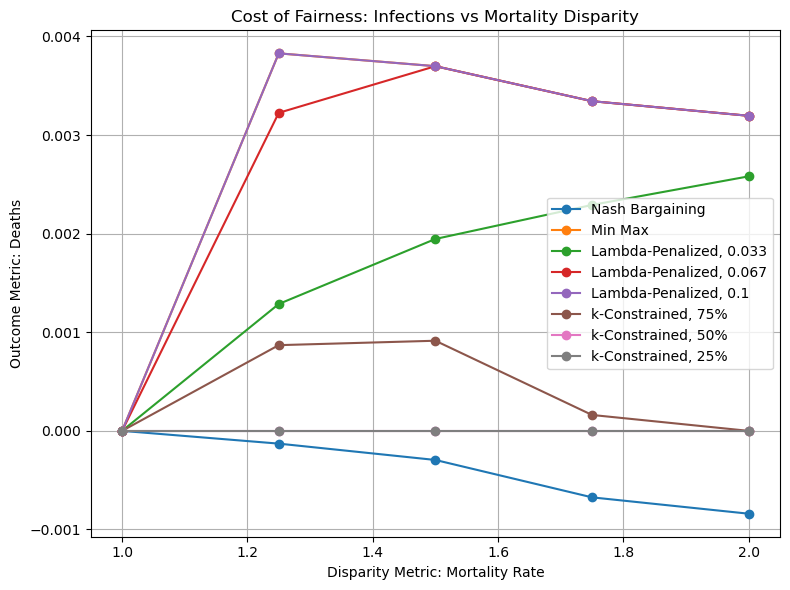

In [214]:
subplot_2_data = [  # Subplot 1: Deaths vs Mortality Disparity
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825013, 1823444, 1822409, 1821675, 1821133], [1825013, 1823680, 1822947, 1822904, 1822664]), "Nash Bargaining"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825013, 1830661, 1829688, 1828998, 1828487], [1825013, 1823680, 1822947, 1822904, 1822664]), "Min Max"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825013, 1826026, 1826494, 1827080, 1827368], [1825013, 1823680, 1822947, 1822904, 1822664]), "Lambda-Penalized, 0.033"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825013, 1829561, 1829688, 1828998, 1828487], [1825013, 1823680, 1822947, 1822904, 1822664]), "Lambda-Penalized, 0.067"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825013, 1830661, 1829688, 1828998, 1828487], [1825013, 1823680, 1822947, 1822904, 1822664]), "Lambda-Penalized, 0.1"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825013, 1825265, 1824613, 1823198, 1822664], [1825013, 1823680, 1822947, 1822904, 1822664]), "k-Constrained, 75%"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825013, 1823680, 1822947, 1822904, 1822664], [1825013, 1823680, 1822947, 1822904, 1822664]), "k-Constrained, 50%"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825013, 1823680, 1822947, 1822904, 1822664], [1825013, 1823680, 1822947, 1822904, 1822664]), "k-Constrained, 25%")
]

plot_single_result(subplot_2_data, "Cost of Fairness: Infections vs Mortality Disparity")

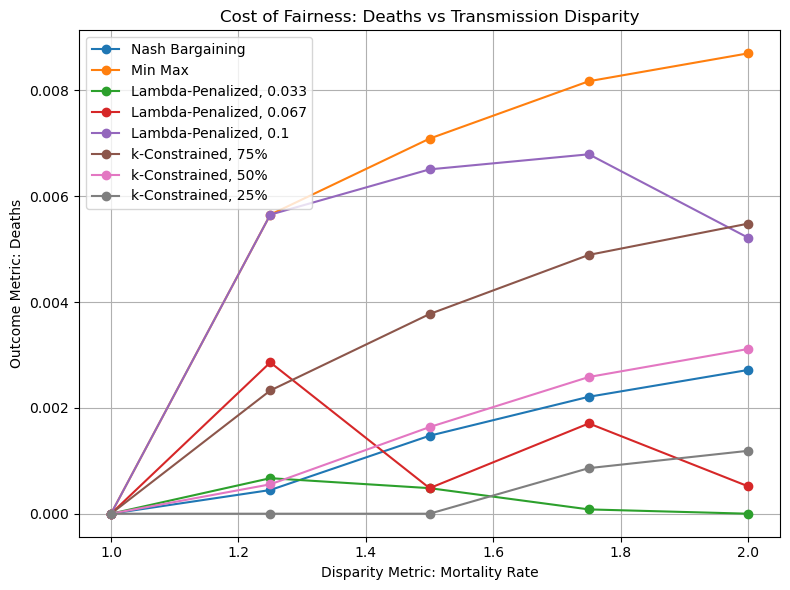

In [215]:
subplot_3_data = [  # Subplot 1: Deaths vs Mortality Disparity
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118148, 120722, 122341, 123346, 124007], [118148, 120668, 122161, 123074, 123671]), "Nash Bargaining"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118148, 121350, 123027, 124080, 124747], [118148, 120668, 122161, 123074, 123671]), "Min Max"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118148, 120749, 122220, 123084, 123671], [118148, 120668, 122161, 123074, 123671]), "Lambda-Penalized, 0.033"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118148, 121013, 122220, 123284, 123735], [118148, 120668, 122161, 123074, 123671]), "Lambda-Penalized, 0.067"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118148, 121350, 122956, 123910, 124316], [118148, 120668, 122161, 123074, 123671]), "Lambda-Penalized, 0.1"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118148, 120949, 122622, 123676, 124349], [118148, 120668, 122161, 123074, 123671]), "k-Constrained, 75%"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118148, 120735, 122361, 123392, 124056], [118148, 120668, 122161, 123074, 123671]), "k-Constrained, 50%"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118148, 120668, 122161, 123180, 123818], [118148, 120668, 122161, 123074, 123671]), "k-Constrained, 25%")
]

plot_single_result(subplot_3_data, "Cost of Fairness: Deaths vs Transmission Disparity")

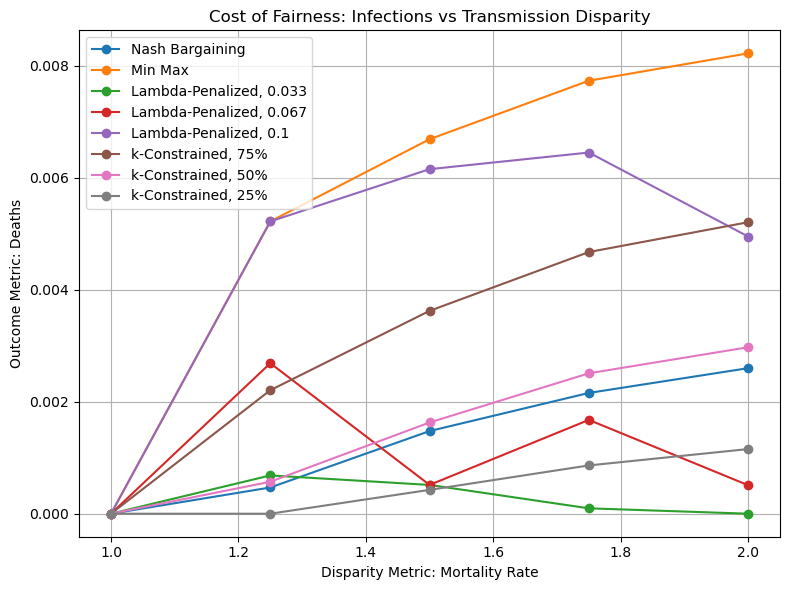

In [216]:
subplot_4_data = [  # Subplot 1: Deaths vs Mortality Disparity
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825433, 1861616, 1884148, 1898000, 1907038], [1825433, 1860745, 1881371, 1893915, 1902094]), "Nash Bargaining"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825433, 1870458, 1893954, 1908561, 1917733], [1825433, 1860745, 1881371, 1893915, 1902094]), "Min Max"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825433, 1862017, 1882338, 1894097, 1902094], [1825433, 1860745, 1881371, 1893915, 1902094]), "Lambda-Penalized, 0.033"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825433, 1865746, 1882338, 1897088, 1903062], [1825433, 1860745, 1881371, 1893915, 1902094]), "Lambda-Penalized, 0.067"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825433, 1870458, 1892948, 1906132, 1911510], [1825433, 1860745, 1881371, 1893915, 1902094]), "Lambda-Penalized, 0.1"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825433, 1864849, 1888187, 1902766, 1911996], [1825433, 1860745, 1881371, 1893915, 1902094]), "k-Constrained, 75%"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825433, 1861807, 1884436, 1898664, 1907749], [1825433, 1860745, 1881371, 1893915, 1902094]), "k-Constrained, 50%"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825433, 1860745, 1882172, 1895548, 1904290], [1825433, 1860745, 1881371, 1893915, 1902094]), "k-Constrained, 25%")
]

plot_single_result(subplot_4_data, "Cost of Fairness: Infections vs Transmission Disparity")

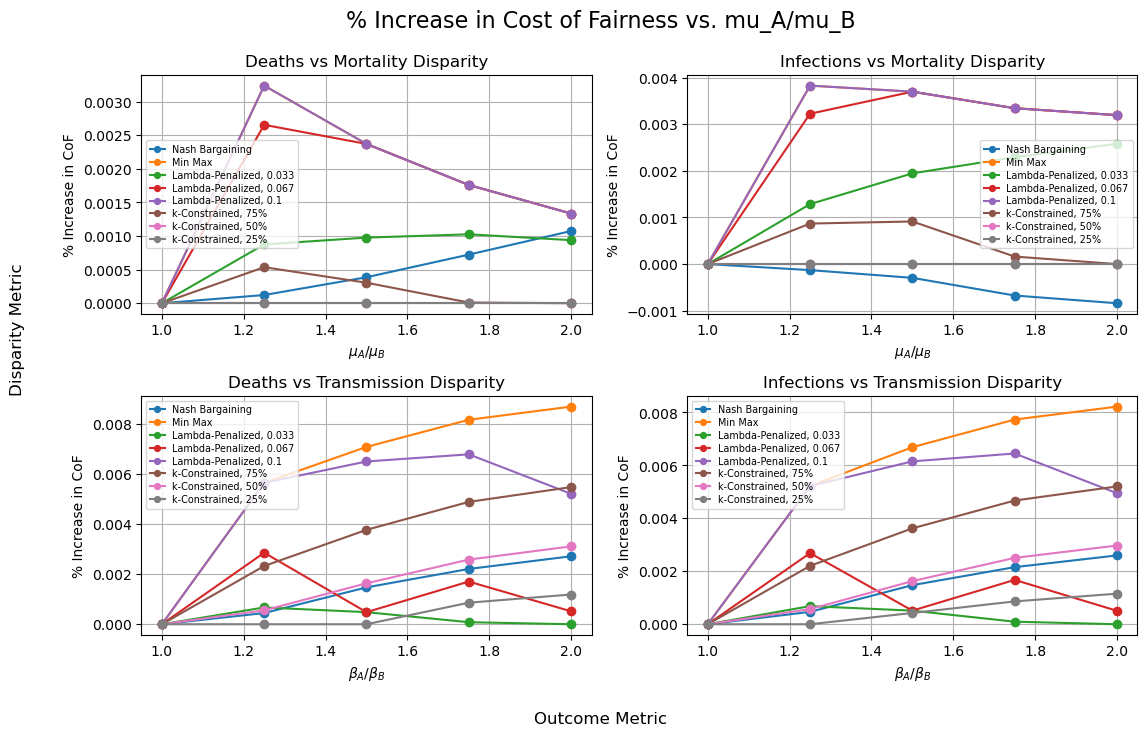

In [217]:
titles = [
    "Deaths vs Mortality Disparity",
    "Infections vs Mortality Disparity",
    "Deaths vs Transmission Disparity",
    "Infections vs Transmission Disparity"
]

subplot_data = [ # This is where the results of the simulation will be plotted 
    [  # Subplot 1: Deaths vs Mortality Disparity
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118118, 106180, 98267, 92635, 88460], [118118, 106167, 98229, 92568, 88365]), "Nash Bargaining"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118118, 106511, 98462, 92731, 88483], [118118, 106167, 98229, 92568, 88365]), "Min Max"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118118, 106260, 98325, 92663, 88448], [118118, 106167, 98229, 92568, 88365]), "Lambda-Penalized, 0.033"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118118, 106449, 98462, 92731, 88483], [118118, 106167, 98229, 92568, 88365]), "Lambda-Penalized, 0.067"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118118, 106511, 98462, 92731, 88483], [118118, 106167, 98229, 92568, 88365]), "Lambda-Penalized, 0.1"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118118, 106224, 98259, 92569, 88365], [118118, 106167, 98229, 92568, 88365]), "k-Constrained, 75%"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118118, 106167, 98229, 92568, 88365], [118118, 106167, 98229, 92568, 88365]), "k-Constrained, 50%"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118118, 106167, 98229, 92568, 88365], [118118, 106167, 98229, 92568, 88365]), "k-Constrained, 25%")
        
    ],
    [  # Subplot 2: Infections vs Mortality Disparity
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825013, 1823444, 1822409, 1821675, 1821133], [1825013, 1823680, 1822947, 1822904, 1822664]), "Nash Bargaining"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825013, 1830661, 1829688, 1828998, 1828487], [1825013, 1823680, 1822947, 1822904, 1822664]), "Min Max"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825013, 1826026, 1826494, 1827080, 1827368], [1825013, 1823680, 1822947, 1822904, 1822664]), "Lambda-Penalized, 0.033"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825013, 1829561, 1829688, 1828998, 1828487], [1825013, 1823680, 1822947, 1822904, 1822664]), "Lambda-Penalized, 0.067"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825013, 1830661, 1829688, 1828998, 1828487], [1825013, 1823680, 1822947, 1822904, 1822664]), "Lambda-Penalized, 0.1"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825013, 1825265, 1824613, 1823198, 1822664], [1825013, 1823680, 1822947, 1822904, 1822664]), "k-Constrained, 75%"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825013, 1823680, 1822947, 1822904, 1822664], [1825013, 1823680, 1822947, 1822904, 1822664]), "k-Constrained, 50%"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825013, 1823680, 1822947, 1822904, 1822664], [1825013, 1823680, 1822947, 1822904, 1822664]), "k-Constrained, 25%")
    ],
    [  # Subplot 3: Deaths vs Transmission Disparity
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118148, 120722, 122341, 123346, 124007], [118148, 120668, 122161, 123074, 123671]), "Nash Bargaining"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118148, 121350, 123027, 124080, 124747], [118148, 120668, 122161, 123074, 123671]), "Min Max"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118148, 120749, 122220, 123084, 123671], [118148, 120668, 122161, 123074, 123671]), "Lambda-Penalized, 0.033"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118148, 121013, 122220, 123284, 123735], [118148, 120668, 122161, 123074, 123671]), "Lambda-Penalized, 0.067"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118148, 121350, 122956, 123910, 124316], [118148, 120668, 122161, 123074, 123671]), "Lambda-Penalized, 0.1"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118148, 120949, 122622, 123676, 124349], [118148, 120668, 122161, 123074, 123671]), "k-Constrained, 75%"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118148, 120735, 122361, 123392, 124056], [118148, 120668, 122161, 123074, 123671]), "k-Constrained, 50%"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([118148, 120668, 122161, 123180, 123818], [118148, 120668, 122161, 123074, 123671]), "k-Constrained, 25%")
    ],
    [  # Subplot 4: Infections vs Transmission Disparity
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825433, 1861616, 1884148, 1898000, 1907038], [1825433, 1860745, 1881371, 1893915, 1902094]), "Nash Bargaining"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825433, 1870458, 1893954, 1908561, 1917733], [1825433, 1860745, 1881371, 1893915, 1902094]), "Min Max"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825433, 1862017, 1882338, 1894097, 1902094], [1825433, 1860745, 1881371, 1893915, 1902094]), "Lambda-Penalized, 0.033"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825433, 1865746, 1882338, 1897088, 1903062], [1825433, 1860745, 1881371, 1893915, 1902094]), "Lambda-Penalized, 0.067"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825433, 1870458, 1892948, 1906132, 1911510], [1825433, 1860745, 1881371, 1893915, 1902094]), "Lambda-Penalized, 0.1"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825433, 1864849, 1888187, 1902766, 1911996], [1825433, 1860745, 1881371, 1893915, 1902094]), "k-Constrained, 75%"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825433, 1861807, 1884436, 1898664, 1907749], [1825433, 1860745, 1881371, 1893915, 1902094]), "k-Constrained, 50%"),
        ([1, 1.25, 1.5, 1.75, 2], compute_percent([1825433, 1860745, 1882172, 1895548, 1904290], [1825433, 1860745, 1881371, 1893915, 1902094]), "k-Constrained, 25%")
    ]
]

plot_results(subplot_data, titles, '% Increase in Cost of Fairness vs. mu_A/mu_B')

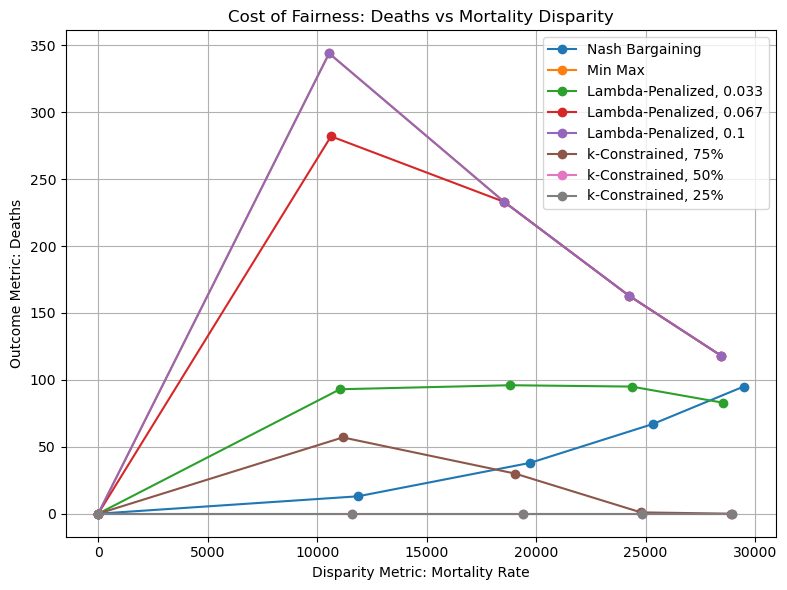

In [218]:
subplot_5_data = [  # Subplot 5: Deaths vs Mortality Disparity
        (compute_difference([59059, 59022, 58997, 58980, 58967], [59059, 47158, 39270, 33655, 29493]), compute_cof([118118, 106180, 98267, 92635, 88460], [118118, 106167, 98229, 92568, 88365]), "Nash Bargaining"),
        (compute_difference([59059, 58528, 58501, 58481, 58467], [59059, 47983, 39961, 34250, 30017]), compute_cof([118118, 106511, 98462, 92731, 88483], [118118, 106167, 98229, 92568, 88365]), "Min Max"),
        (compute_difference([59059, 58651, 58563, 58508, 58479], [59059, 47610, 39762, 34154, 29969]), compute_cof([118118, 106260, 98325, 92663, 88448], [118118, 106167, 98229, 92568, 88365]), "Lambda-Penalized, 0.033"),
        (compute_difference([59059, 58540, 58501, 58481, 58467], [59059, 47909, 39961, 34250, 30017]), compute_cof([118118, 106449, 98462, 92731, 88483], [118118, 106167, 98229, 92568, 88365]), "Lambda-Penalized, 0.067"),
        (compute_difference([59059, 58528, 58501, 58481, 58467], [59059, 47983, 39961, 34250, 30017]), compute_cof([118118, 106511, 98462, 92731, 88483], [118118, 106167, 98229, 92568, 88365]), "Lambda-Penalized, 0.1"),
        (compute_difference([59059, 58697, 58647, 58676, 58638], [59059, 47527, 39613, 33893, 29727]), compute_cof([118118, 106224, 98259, 92569, 88365], [118118, 106167, 98229, 92568, 88365]), "k-Constrained, 75%"),
        (compute_difference([59059, 58889, 58803, 58702, 58662], [59059, 47278, 39425, 33866, 29702]), compute_cof([118118, 106167, 98229, 92568, 88365], [118118, 106167, 98229, 92568, 88365]), "k-Constrained, 50%"),
        (compute_difference([59059, 58889, 58803, 58702, 58662], [59059, 47278, 39425, 33866, 29702]), compute_cof([118118, 106167, 98229, 92568, 88365], [118118, 106167, 98229, 92568, 88365]), "k-Constrained, 25%")
]

plot_single_result(subplot_5_data, "Cost of Fairness: Deaths vs Mortality Disparity")

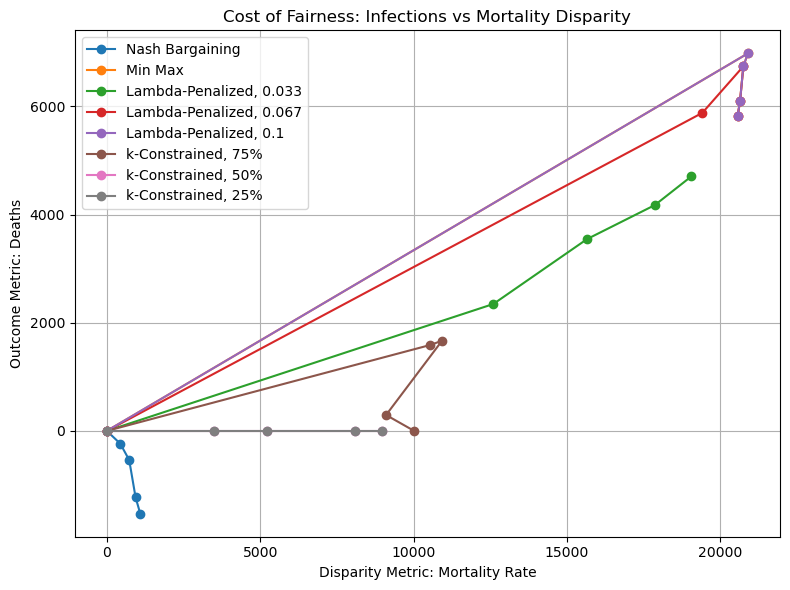

In [219]:
subplot_6_data = [  # Subplot 6: Infections vs Mortality Disparity
        (compute_difference([912507, 911941, 911569, 911306, 911111], [912507, 911503, 910840, 910369, 910021]), compute_cof([1825013, 1823444, 1822409, 1821675, 1821133], [1825013, 1823680, 1822947, 1822904, 1822664]), "Nash Bargaining"),
        (compute_difference([912507, 904883, 904471, 904180, 903964], [912507, 925779, 925217, 924818, 924523]), compute_cof([1825013, 1830661, 1829688, 1828998, 1828487], [1825013, 1823680, 1822947, 1822904, 1822664]), "Min Max"),
        (compute_difference([912507, 906715, 905421, 904609, 904160], [912507, 919311, 921074, 922472, 923207]), compute_cof([1825013, 1826026, 1826494, 1827080, 1827368], [1825013, 1823680, 1822947, 1822904, 1822664]), "Lambda-Penalized, 0.033"),
        (compute_difference([912507, 905076, 904471, 904180, 903964], [912507, 924486, 925217, 924818, 924523]), compute_cof([1825013, 1829561, 1829688, 1828998, 1828487], [1825013, 1823680, 1822947, 1822904, 1822664]), "Lambda-Penalized, 0.067"),
        (compute_difference([912507, 904883, 904471, 904180, 903964], [912507, 925779, 925217, 924818, 924523]), compute_cof([1825013, 1830661, 1829688, 1828998, 1828487], [1825013, 1823680, 1822947, 1822904, 1822664]), "Lambda-Penalized, 0.1"),
        (compute_difference([912507, 907374, 907049, 907049, 906489], [912507, 917891, 917973, 916150, 916506]), compute_cof([1825013, 1825265, 1824613, 1823198, 1822664], [1825013, 1823680, 1822947, 1822904, 1822664]), "k-Constrained, 75%"),
        (compute_difference([912507, 910092, 908863, 907414, 906842], [912507, 913588, 914084, 915490, 915822]), compute_cof([1825013, 1823680, 1822947, 1822904, 1822664], [1825013, 1823680, 1822947, 1822904, 1822664]), "k-Constrained, 50%"),
        (compute_difference([912507, 910092, 908863, 907414, 906842], [912507, 913588, 914084, 915490, 915822]), compute_cof([1825013, 1823680, 1822947, 1822904, 1822664], [1825013, 1823680, 1822947, 1822904, 1822664]), "k-Constrained, 25%")
]

plot_single_result(subplot_6_data, "Cost of Fairness: Infections vs Mortality Disparity")

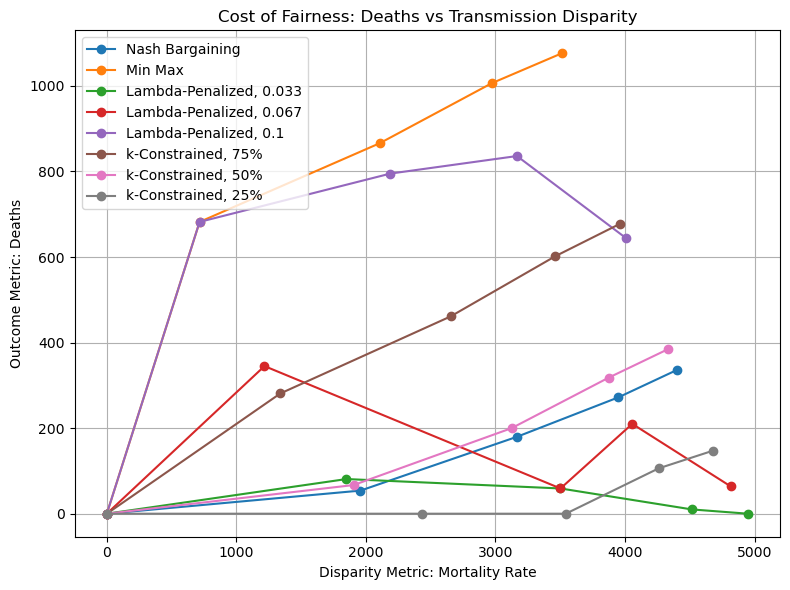

In [220]:
subplot_7_data = [  # Subplot 7: Deaths vs Transmission Disparity
        (compute_difference([59074, 59382, 59587, 59699, 59803], [59074, 61340, 62755, 63648, 64204]), compute_cof([118148, 120722, 122341, 123346, 124007], [118148, 120668, 122161, 123074, 123671]), "Nash Bargaining"),
        (compute_difference([59074, 60317, 60460, 60555, 60618], [59074, 61033, 62567, 63525, 64129]), compute_cof([118148, 121350, 123027, 124080, 124747], [118148, 120668, 122161, 123074, 123671]), "Min Max"),
        (compute_difference([59074, 59450, 59359, 59284, 59361], [59074, 61300, 62861, 63800, 64310]), compute_cof([118148, 120749, 122220, 123084, 123671], [118148, 120668, 122161, 123074, 123671]), "Lambda-Penalized, 0.033"),
        (compute_difference([59074, 59898, 59359, 59614, 59460], [59074, 61115, 62861, 63670, 64275]), compute_cof([118148, 121013, 122220, 123284, 123735], [118148, 120668, 122161, 123074, 123671]), "Lambda-Penalized, 0.067"),
        (compute_difference([59074, 60317, 60384, 60372, 60156], [59074, 61033, 62573, 63538, 64160]), compute_cof([118148, 121350, 122956, 123910, 124316], [118148, 120668, 122161, 123074, 123671]), "Lambda-Penalized, 0.1"),
        (compute_difference([59074, 59805, 59984, 60107, 60193], [59074, 61144, 62637, 63570, 64157]), compute_cof([118148, 120949, 122622, 123676, 124349], [118148, 120668, 122161, 123074, 123671]), "k-Constrained, 75%"),
        (compute_difference([59074, 59415, 59618, 59759, 59860], [59074, 61320, 62743, 63633, 64195]), compute_cof([118148, 120735, 122361, 123392, 124056], [118148, 120668, 122161, 123074, 123671]), "k-Constrained, 50%"),
        (compute_difference([59074, 59119, 59333, 59460, 59571], [59074, 61549, 62876, 63720, 64247]), compute_cof([118148, 120668, 122161, 123180, 123818], [118148, 120668, 122161, 123074, 123671]), "k-Constrained, 25%")
]

plot_single_result(subplot_7_data, "Cost of Fairness: Deaths vs Transmission Disparity")

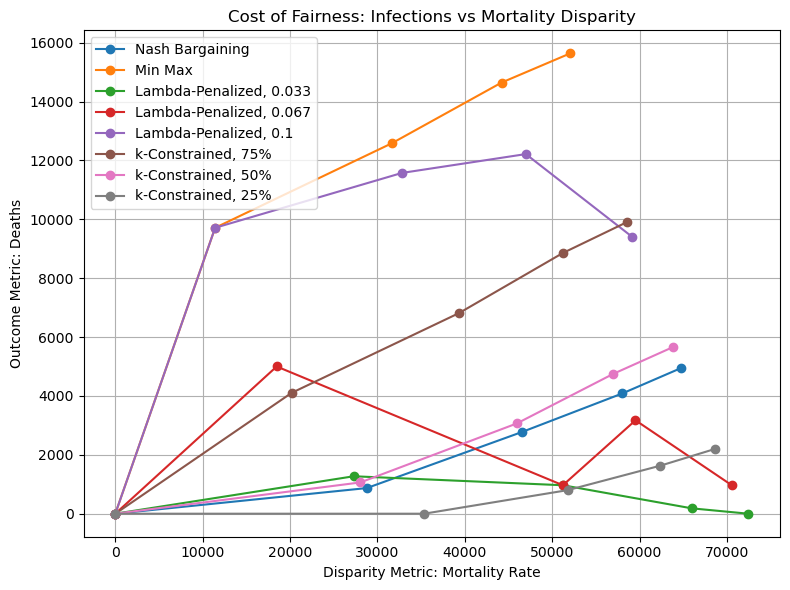

In [221]:
subplot_8_data = [  # Subplot 8: Infections vs Transmission Disparity
        (compute_difference([912717, 916417, 918800, 919993, 921164], [912717, 945199, 965348, 978007, 985874]), compute_cof([1825433, 1861616, 1884148, 1898000, 1907038], [1825433, 1860745, 1881371, 1893915, 1902094]), "Nash Bargaining"),
        (compute_difference([912717, 929517, 931161, 932180, 932836], [912717, 940941, 962794, 976381, 984897]), compute_cof([1825433, 1870458, 1893954, 1908561, 1917733], [1825433, 1860745, 1881371, 1893915, 1902094]), "Min Max"),
        (compute_difference([912717, 917367, 915562, 914062, 914827], [912717, 944650, 966776, 980035, 987267]), compute_cof([1825433, 1862017, 1882338, 1894097, 1902094], [1825433, 1860745, 1881371, 1893915, 1902094]), "Lambda-Penalized, 0.033"),
        (compute_difference([912717, 923639, 915562, 918781, 916261], [912717, 942107, 966776, 978307, 986800]), compute_cof([1825433, 1865746, 1882338, 1897088, 1903062], [1825433, 1860745, 1881371, 1893915, 1902094]), "Lambda-Penalized, 0.067"),
        (compute_difference([912717, 929517, 930070, 929577, 926206], [912717, 940941, 962878, 976555, 985304]), compute_cof([1825433, 1870458, 1892948, 1906132, 1911510], [1825433, 1860745, 1881371, 1893915, 1902094]), "Lambda-Penalized, 0.1"),
        (compute_difference([912717, 922339, 924425, 925793, 926738], [912717, 942510, 963762, 976973, 985258]), compute_cof([1825433, 1864849, 1888187, 1902766, 1911996], [1825433, 1860745, 1881371, 1893915, 1902094]), "k-Constrained, 75%"),
        (compute_difference([912717, 916886, 919249, 920847, 921988], [912717, 944921, 965187, 977817, 985761]), compute_cof([1825433, 1861807, 1884436, 1898664, 1907749], [1825433, 1860745, 1881371, 1893915, 1902094]), "k-Constrained, 50%"),
        (compute_difference([912717, 912701, 915198, 916581, 917855], [912717, 948044, 966974, 978967, 986435]), compute_cof([1825433, 1860745, 1882172, 1895548, 1904290], [1825433, 1860745, 1881371, 1893915, 1902094]), "k-Constrained, 25%")
]

plot_single_result(subplot_8_data, "Cost of Fairness: Infections vs Mortality Disparity")

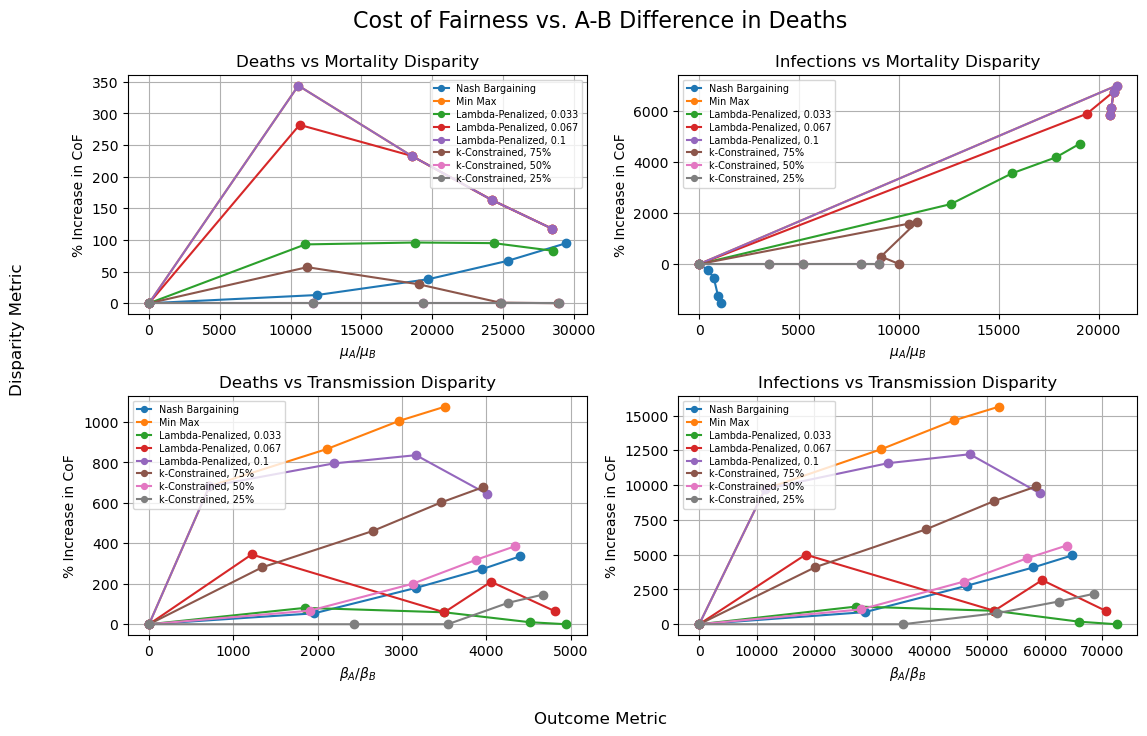

In [222]:
titles = [
    "Deaths vs Mortality Disparity",
    "Infections vs Mortality Disparity",
    "Deaths vs Transmission Disparity",
    "Infections vs Transmission Disparity"
]

subplot_data = [ # This is where the results of the simulation will be plotted 
    [  # Subplot 5: Deaths vs Mortality Disparity
        (compute_difference([59059, 59022, 58997, 58980, 58967], [59059, 47158, 39270, 33655, 29493]), compute_cof([118118, 106180, 98267, 92635, 88460], [118118, 106167, 98229, 92568, 88365]), "Nash Bargaining"),
        (compute_difference([59059, 58528, 58501, 58481, 58467], [59059, 47983, 39961, 34250, 30017]), compute_cof([118118, 106511, 98462, 92731, 88483], [118118, 106167, 98229, 92568, 88365]), "Min Max"),
        (compute_difference([59059, 58651, 58563, 58508, 58479], [59059, 47610, 39762, 34154, 29969]), compute_cof([118118, 106260, 98325, 92663, 88448], [118118, 106167, 98229, 92568, 88365]), "Lambda-Penalized, 0.033"),
        (compute_difference([59059, 58540, 58501, 58481, 58467], [59059, 47909, 39961, 34250, 30017]), compute_cof([118118, 106449, 98462, 92731, 88483], [118118, 106167, 98229, 92568, 88365]), "Lambda-Penalized, 0.067"),
        (compute_difference([59059, 58528, 58501, 58481, 58467], [59059, 47983, 39961, 34250, 30017]), compute_cof([118118, 106511, 98462, 92731, 88483], [118118, 106167, 98229, 92568, 88365]), "Lambda-Penalized, 0.1"),
        (compute_difference([59059, 58697, 58647, 58676, 58638], [59059, 47527, 39613, 33893, 29727]), compute_cof([118118, 106224, 98259, 92569, 88365], [118118, 106167, 98229, 92568, 88365]), "k-Constrained, 75%"),
        (compute_difference([59059, 58889, 58803, 58702, 58662], [59059, 47278, 39425, 33866, 29702]), compute_cof([118118, 106167, 98229, 92568, 88365], [118118, 106167, 98229, 92568, 88365]), "k-Constrained, 50%"),
        (compute_difference([59059, 58889, 58803, 58702, 58662], [59059, 47278, 39425, 33866, 29702]), compute_cof([118118, 106167, 98229, 92568, 88365], [118118, 106167, 98229, 92568, 88365]), "k-Constrained, 25%")
    ], 
    [  # Subplot 6: Infections vs Mortality Disparity
        (compute_difference([912507, 911941, 911569, 911306, 911111], [912507, 911503, 910840, 910369, 910021]), compute_cof([1825013, 1823444, 1822409, 1821675, 1821133], [1825013, 1823680, 1822947, 1822904, 1822664]), "Nash Bargaining"),
        (compute_difference([912507, 904883, 904471, 904180, 903964], [912507, 925779, 925217, 924818, 924523]), compute_cof([1825013, 1830661, 1829688, 1828998, 1828487], [1825013, 1823680, 1822947, 1822904, 1822664]), "Min Max"),
        (compute_difference([912507, 906715, 905421, 904609, 904160], [912507, 919311, 921074, 922472, 923207]), compute_cof([1825013, 1826026, 1826494, 1827080, 1827368], [1825013, 1823680, 1822947, 1822904, 1822664]), "Lambda-Penalized, 0.033"),
        (compute_difference([912507, 905076, 904471, 904180, 903964], [912507, 924486, 925217, 924818, 924523]), compute_cof([1825013, 1829561, 1829688, 1828998, 1828487], [1825013, 1823680, 1822947, 1822904, 1822664]), "Lambda-Penalized, 0.067"),
        (compute_difference([912507, 904883, 904471, 904180, 903964], [912507, 925779, 925217, 924818, 924523]), compute_cof([1825013, 1830661, 1829688, 1828998, 1828487], [1825013, 1823680, 1822947, 1822904, 1822664]), "Lambda-Penalized, 0.1"),
        (compute_difference([912507, 907374, 907049, 907049, 906489], [912507, 917891, 917973, 916150, 916506]), compute_cof([1825013, 1825265, 1824613, 1823198, 1822664], [1825013, 1823680, 1822947, 1822904, 1822664]), "k-Constrained, 75%"),
        (compute_difference([912507, 910092, 908863, 907414, 906842], [912507, 913588, 914084, 915490, 915822]), compute_cof([1825013, 1823680, 1822947, 1822904, 1822664], [1825013, 1823680, 1822947, 1822904, 1822664]), "k-Constrained, 50%"),
        (compute_difference([912507, 910092, 908863, 907414, 906842], [912507, 913588, 914084, 915490, 915822]), compute_cof([1825013, 1823680, 1822947, 1822904, 1822664], [1825013, 1823680, 1822947, 1822904, 1822664]), "k-Constrained, 25%")
    ],
    [  # Subplot 7: Deaths vs Transmission Disparity
        (compute_difference([59074, 59382, 59587, 59699, 59803], [59074, 61340, 62755, 63648, 64204]), compute_cof([118148, 120722, 122341, 123346, 124007], [118148, 120668, 122161, 123074, 123671]), "Nash Bargaining"),
        (compute_difference([59074, 60317, 60460, 60555, 60618], [59074, 61033, 62567, 63525, 64129]), compute_cof([118148, 121350, 123027, 124080, 124747], [118148, 120668, 122161, 123074, 123671]), "Min Max"),
        (compute_difference([59074, 59450, 59359, 59284, 59361], [59074, 61300, 62861, 63800, 64310]), compute_cof([118148, 120749, 122220, 123084, 123671], [118148, 120668, 122161, 123074, 123671]), "Lambda-Penalized, 0.033"),
        (compute_difference([59074, 59898, 59359, 59614, 59460], [59074, 61115, 62861, 63670, 64275]), compute_cof([118148, 121013, 122220, 123284, 123735], [118148, 120668, 122161, 123074, 123671]), "Lambda-Penalized, 0.067"),
        (compute_difference([59074, 60317, 60384, 60372, 60156], [59074, 61033, 62573, 63538, 64160]), compute_cof([118148, 121350, 122956, 123910, 124316], [118148, 120668, 122161, 123074, 123671]), "Lambda-Penalized, 0.1"),
        (compute_difference([59074, 59805, 59984, 60107, 60193], [59074, 61144, 62637, 63570, 64157]), compute_cof([118148, 120949, 122622, 123676, 124349], [118148, 120668, 122161, 123074, 123671]), "k-Constrained, 75%"),
        (compute_difference([59074, 59415, 59618, 59759, 59860], [59074, 61320, 62743, 63633, 64195]), compute_cof([118148, 120735, 122361, 123392, 124056], [118148, 120668, 122161, 123074, 123671]), "k-Constrained, 50%"),
        (compute_difference([59074, 59119, 59333, 59460, 59571], [59074, 61549, 62876, 63720, 64247]), compute_cof([118148, 120668, 122161, 123180, 123818], [118148, 120668, 122161, 123074, 123671]), "k-Constrained, 25%")
    ],
    [  # Subplot 4: Infections vs Transmission Disparity
        (compute_difference([912717, 916417, 918800, 919993, 921164], [912717, 945199, 965348, 978007, 985874]), compute_cof([1825433, 1861616, 1884148, 1898000, 1907038], [1825433, 1860745, 1881371, 1893915, 1902094]), "Nash Bargaining"),
        (compute_difference([912717, 929517, 931161, 932180, 932836], [912717, 940941, 962794, 976381, 984897]), compute_cof([1825433, 1870458, 1893954, 1908561, 1917733], [1825433, 1860745, 1881371, 1893915, 1902094]), "Min Max"),
        (compute_difference([912717, 917367, 915562, 914062, 914827], [912717, 944650, 966776, 980035, 987267]), compute_cof([1825433, 1862017, 1882338, 1894097, 1902094], [1825433, 1860745, 1881371, 1893915, 1902094]), "Lambda-Penalized, 0.033"),
        (compute_difference([912717, 923639, 915562, 918781, 916261], [912717, 942107, 966776, 978307, 986800]), compute_cof([1825433, 1865746, 1882338, 1897088, 1903062], [1825433, 1860745, 1881371, 1893915, 1902094]), "Lambda-Penalized, 0.067"),
        (compute_difference([912717, 929517, 930070, 929577, 926206], [912717, 940941, 962878, 976555, 985304]), compute_cof([1825433, 1870458, 1892948, 1906132, 1911510], [1825433, 1860745, 1881371, 1893915, 1902094]), "Lambda-Penalized, 0.1"),
        (compute_difference([912717, 922339, 924425, 925793, 926738], [912717, 942510, 963762, 976973, 985258]), compute_cof([1825433, 1864849, 1888187, 1902766, 1911996], [1825433, 1860745, 1881371, 1893915, 1902094]), "k-Constrained, 75%"),
        (compute_difference([912717, 916886, 919249, 920847, 921988], [912717, 944921, 965187, 977817, 985761]), compute_cof([1825433, 1861807, 1884436, 1898664, 1907749], [1825433, 1860745, 1881371, 1893915, 1902094]), "k-Constrained, 50%"),
        (compute_difference([912717, 912701, 915198, 916581, 917855], [912717, 948044, 966974, 978967, 986435]), compute_cof([1825433, 1860745, 1882172, 1895548, 1904290], [1825433, 1860745, 1881371, 1893915, 1902094]), "k-Constrained, 25%")
    ]
]

plot_results(subplot_data, titles, 'Cost of Fairness vs. A-B Difference in Deaths')